# Text Classification Example

- This example shows text Classification as an example of supervised machine learning task.
- The main steps are:
    - Explore dataset
    - Data Preparation
    - Feature Engineering
    - Model Training
    - Performance Assessment

#### Problem Definition
- As discussed above, the problem in context is supervised learning problem. 
- The inherent requirement for supervised learning is the use of labeled dataset 
- Labeled data is necessary for the ML algorithms to learn the patterns in the data. 
- We are using a sample data from amazon reviews.

![Text Classification](https://raoumer.github.io/images/MLmodel.png)

In [1]:
# Import necessary libraries for dataset preparation, feature engineering, model training 

from sklearn import model_selection, preprocessing, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pandas, numpy #textblob, string


## 1. Explore data and prepare data
- use the sample data from amazon reviews. More data available at https://drive.google.com/drive/folders/0Bz8a_Dbh9Qhbfll6bVpmNUtUcFdjYmF2SEpmZUZUcVNiMUw1TWN6RDV3a0JHT3kxLVhVR2M
- load the data into a pandas dataframe containing two columns – text and label.

In [2]:
# load the dataset from amazon reviews
data = open('data/corpus.txt').read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# create a dataframe using texts and lables
trainDF = pandas.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels

#### It is necessary to do an exploratory data analysis in order to gain some insights from the data.

#### How is the data like?

In [3]:
trainDF.head()

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


#### how many 'class label' present in the dataset??

In [4]:
trainDF['label'].unique()

array(['__label__2', '__label__1'], dtype=object)

#### Is the dataset balanced??

If the dataset is balanced then, the dataset contains an approximately equal portion of each class.

This is important, for instance, if we had two classes ( say A and B) and a 98% of observations belonging to a single class 'A', then a dumb classifier which always outputs 'A' would have 98% accuracy, even if it fail all the predictions of class B ( i.e. the minority class).

Also, there are ways to cope with such inbalanced datasets, like undersample the majority class or oversample the minority one. 
Sometimes, we may have to work with imbalanced datasets. In such cases, performance metrics other than accuracy like the precision, the recall or the F1-score are preferable.

<AxesSubplot:>

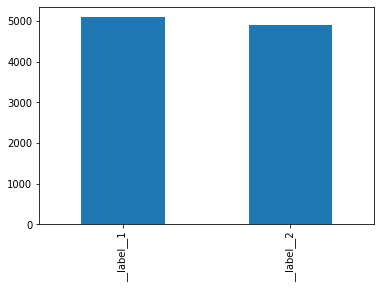

In [5]:
trainDF['label'].value_counts().plot(kind='bar')

#### Split the dataset into training and validation/testing sets. 

In [6]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

#### Encode target column so that it can be used in machine learning models.
preprocessing.LabelEncoder() is used to encode target values, i.e. y, and not the input X.
This encodes target labels with values '0' and '1' for '__label__1' and '__label__2'.

In [7]:
encoder = preprocessing.LabelEncoder()

train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

## 2. Feature Engineering
- Raw text data will be transformed into feature vectors
- New features will be generated using the existing dataset
- Feature Selection: selecting a subset of relevant features (i.e. predictor variables) for constructing ML model.
- Feature Extraction: creating a new and less number of features for constructing ML model.
    - E.g. If the original data are images. We extract the redness value, or a description of the shape of an object in the image. It's lossy, but at least we get some good representation for the ML algorithm to work.
- Feature Selection chooses a subset of the original features whereas Feature Extraction creates new features from original features.
- Feature engineering: careful preprocessing into more meaningful features, even if we use the original data variables or create new ones.
    - E.g. instead of using original variables (say x, y, z) we decide to use log(x)-sqrt(y)*z instead, because this derived form is more favorable for the ML algorithm to solve the problem and get better results.

### 2.1 Count Vectors as features
- Count Vector is a matrix notation of the dataset in which:
    - every row represents a document from the corpus, 
    - every column represents a term from the corpus, 
    - every cell represents the frequency count of a particular term in a particular document.
    
    
- An example of Document Term Matrix:
![Document Term Matrix](http://www.darrinbishop.com/wp-content/uploads/2017/10/Document-Term-Matrix.png)


In [8]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

### 2.2 TFIDF vectors as features

- TFIDF score represents the relative importance of a term in the document and the entire corpus. 
- TFIDF score is composed by two terms: 
    - the first computes the normalized Term Frequency (TF), 
    - the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

- TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
- IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

In [9]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(trainDF['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDF['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)


## 3. Model Building

- An importnat step in text classification is to train a classifier using the features. 
- Various machine learning classifiers:
    - Naive Bayes Classifier
    - Support Vector Machine
    - Bagging Models
    - Boosting Models
    - etc.

In [10]:
def performance_check(predictions_SVM, valid_y):
    
    print("Confusion Matrix:")
    confusion_mat = confusion_matrix(predictions_SVM, valid_y)
    print(confusion_mat)
    
    print("\nClassification Report:")
    print(classification_report(predictions_SVM, valid_y))
    
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(predictions_SVM, valid_y)
    print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(predictions_SVM, valid_y)
    print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
    recall = recall_score(predictions_SVM, valid_y)
    print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(predictions_SVM, valid_y)
    print('F1 score: %f' % f1)
    

### 3.1 SVM Model

Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. The model extracts a best possible hyper-plane / line that segregates the two classes

In [11]:

# Fit the word level tfidf

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(xtrain_tfidf,train_y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(xvalid_tfidf)

performance_check(predictions_SVM, valid_y)


Confusion Matrix:
[[1129  166]
 [ 175 1030]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1295
           1       0.86      0.85      0.86      1205

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500

Accuracy: 0.863600
Precision: 0.861204
Recall: 0.854772
F1 score: 0.857976


In [12]:
# Fit the tfidf_ngram

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto') # change kernels to 'poly', 'rbf' and see
SVM.fit(xtrain_tfidf_ngram,train_y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(xvalid_tfidf_ngram)

performance_check(predictions_SVM, valid_y)

Confusion Matrix:
[[1068  203]
 [ 236  993]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1271
           1       0.83      0.81      0.82      1229

    accuracy                           0.82      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.82      0.82      0.82      2500

Accuracy: 0.824400
Precision: 0.830268
Recall: 0.807974
F1 score: 0.818969


## Further Improvements
- Data pre-processing steps to improve accuracy.
- other Word Vectorization techniques such as Word2Vec.
- Parameter tuning with techniques such as Grid Search.
- Other classification Algorithms Like Bagging/Boosting Models, deep learning, etc.
- Cross Validation

## References:
- https://raoumer.github.io/blog_posts/building_ML_model.html
- https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/
- https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/
- https://towardsdatascience.com/text-classification-in-python-dd95d264c802
- https://towardsdatascience.com/getting-data-ready-for-modelling-feature-engineering-feature-selection-dimension-reduction-39dfa267b95a
- https://stackoverflow.com/questions/39130600/what-is-the-difference-between-feature-engineering-and-feature-extraction